# L4: Describe-and-Generate game 🖍️

In this lesson, we're going to take what we learned previously, text-to-image and image-to-text, and put them together in a single fun app that we can play with. In the previous lessons, we learned how to build a Gradio app for NLP applications, how to build a captioning app, and how to build a text-to-image app. So now, let's join all the knowledge that we got in the other lessons, and let's build a cool game.

Load your HF API key and relevant Python libraries

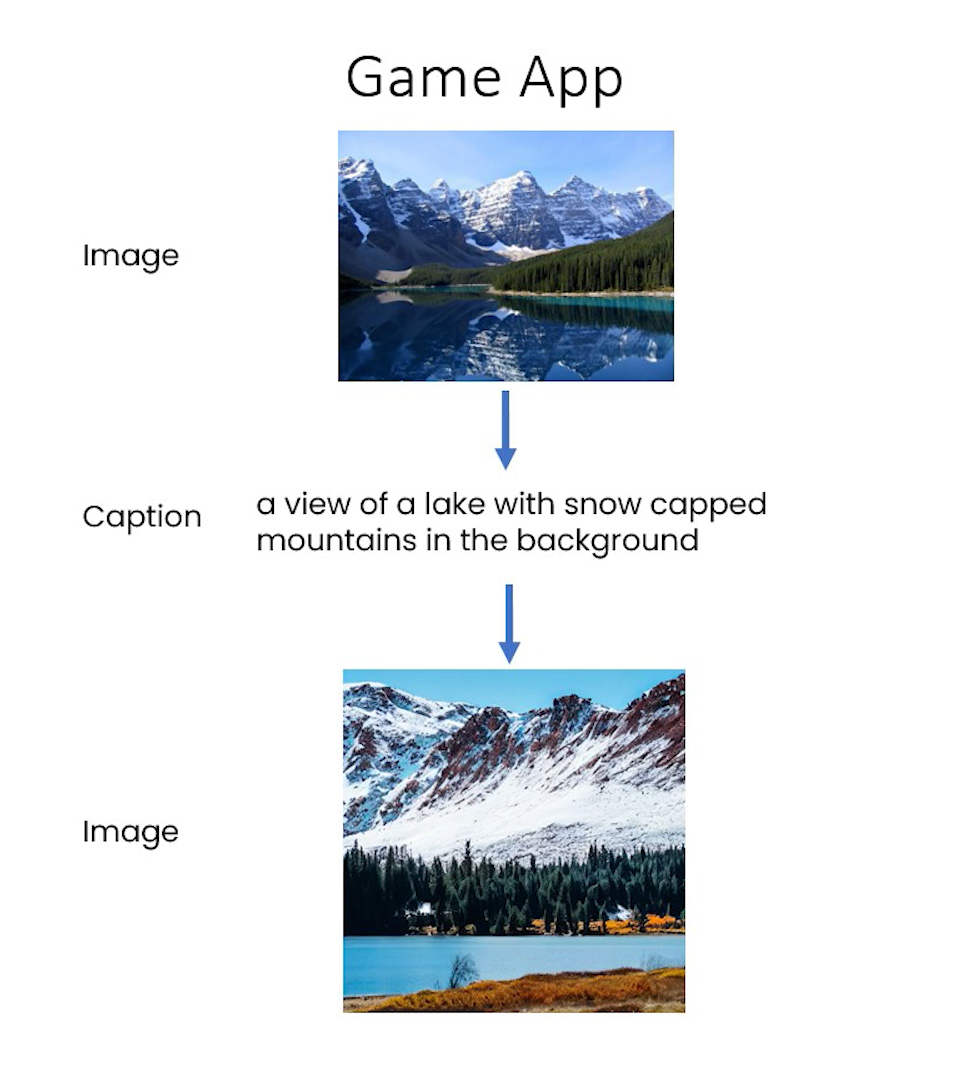

In this game, we're going to start with the captioning, And then from that caption, we're going to generate a new image. So let's start by doing the regular imports. And here in our helper function, you will see that we have an empty endpoint URL here and two endpoint variables. Because basically in this lesson, we'll be using two APIs. The text to image API and the image to text API.

In [ ]:
import os
import io
from IPython.display import Image, display, HTML
from PIL import Image
import base64 

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file
hf_api_key = os.environ['HF_API_KEY']

In [ ]:
# Helper function
import requests, json

#Here we are going to call multiple endpoints!
def get_completion(inputs, parameters=None, ENDPOINT_URL=""):
    headers = {
      "Authorization": f"Bearer {hf_api_key}",
      "Content-Type": "application/json"
    }   
    data = { "inputs": inputs }
    if parameters is not None:
        data.update({"parameters": parameters})
    response = requests.request("POST",
                                ENDPOINT_URL,
                                headers=headers,
                                data=json.dumps(data))
    return json.loads(response.content.decode("utf-8"))

In [ ]:
#text-to-image
TTI_ENDPOINT = os.environ['HF_API_TTI_BASE']
#image-to-text
ITT_ENDPOINT = os.environ['HF_API_ITT_BASE']

## Building your game with `gr.Blocks()`

So let's bring our functions from lessons three and four. So we have the image to Base64, the Base64 to image, the captioner that takes an image and generates a caption, and the generate function that takes a text and generates an image. To get started, let's import Gradio, and let's build a simple captioning app.

In [ ]:
#Bringing the functions from lessons 3 and 4!
def image_to_base64_str(pil_image):
    byte_arr = io.BytesIO()
    pil_image.save(byte_arr, format='PNG')
    byte_arr = byte_arr.getvalue()
    return str(base64.b64encode(byte_arr).decode('utf-8'))

def base64_to_pil(img_base64):
    base64_decoded = base64.b64decode(img_base64)
    byte_stream = io.BytesIO(base64_decoded)
    pil_image = Image.open(byte_stream)
    return pil_image

def captioner(image):
    base64_image = image_to_base64_str(image)
    result = get_completion(base64_image, None, ITT_ENDPOINT)
    return result[0]['generated_text']

def generate(prompt):
    output = get_completion(prompt, None, TTI_ENDPOINT)
    result_image = base64_to_pil(output)
    return result_image

### First attempt, just captioning

You can see here that we have the upload image, generate caption, then the generated caption output, and then from that output you have the generated image. And how do we do that? Well, essentially, it's super simple with Gradio blocks. So we use our two buttons, so button caption and button image, and each button has its own function.

In [ ]:
import gradio as gr 
with gr.Blocks() as demo:
    gr.Markdown("# Describe-and-Generate game 🖍️")
    image_upload = gr.Image(label="Your first image",type="pil")
    btn_caption = gr.Button("Generate caption")
    caption = gr.Textbox(label="Generated caption")
    
    btn_caption.click(fn=captioner, inputs=[image_upload], outputs=[caption])

gr.close_all()
demo.launch(share=True, server_port=int(os.environ['PORT1']))

### Let's add generation

So the button caption will essentially call the captioner function, as the input will be the image upload, and the output would be the caption, just like we did in the previous cell. But then the button image will take the output of our last function, which is the caption, we'll put it into the generate function and then we'll output an image. So let's see how it goes.

In [ ]:
with gr.Blocks() as demo:
    gr.Markdown("# Describe-and-Generate game 🖍️")
    image_upload = gr.Image(label="Your first image",type="pil")
    btn_caption = gr.Button("Generate caption")
    caption = gr.Textbox(label="Generated caption")
    btn_image = gr.Button("Generate image")
    image_output = gr.Image(label="Generated Image")
    btn_caption.click(fn=captioner, inputs=[image_upload], outputs=[caption])
    btn_image.click(fn=generate, inputs=[caption], outputs=[image_output])

gr.close_all()
demo.launch(share=True, server_port=int(os.environ['PORT2']))

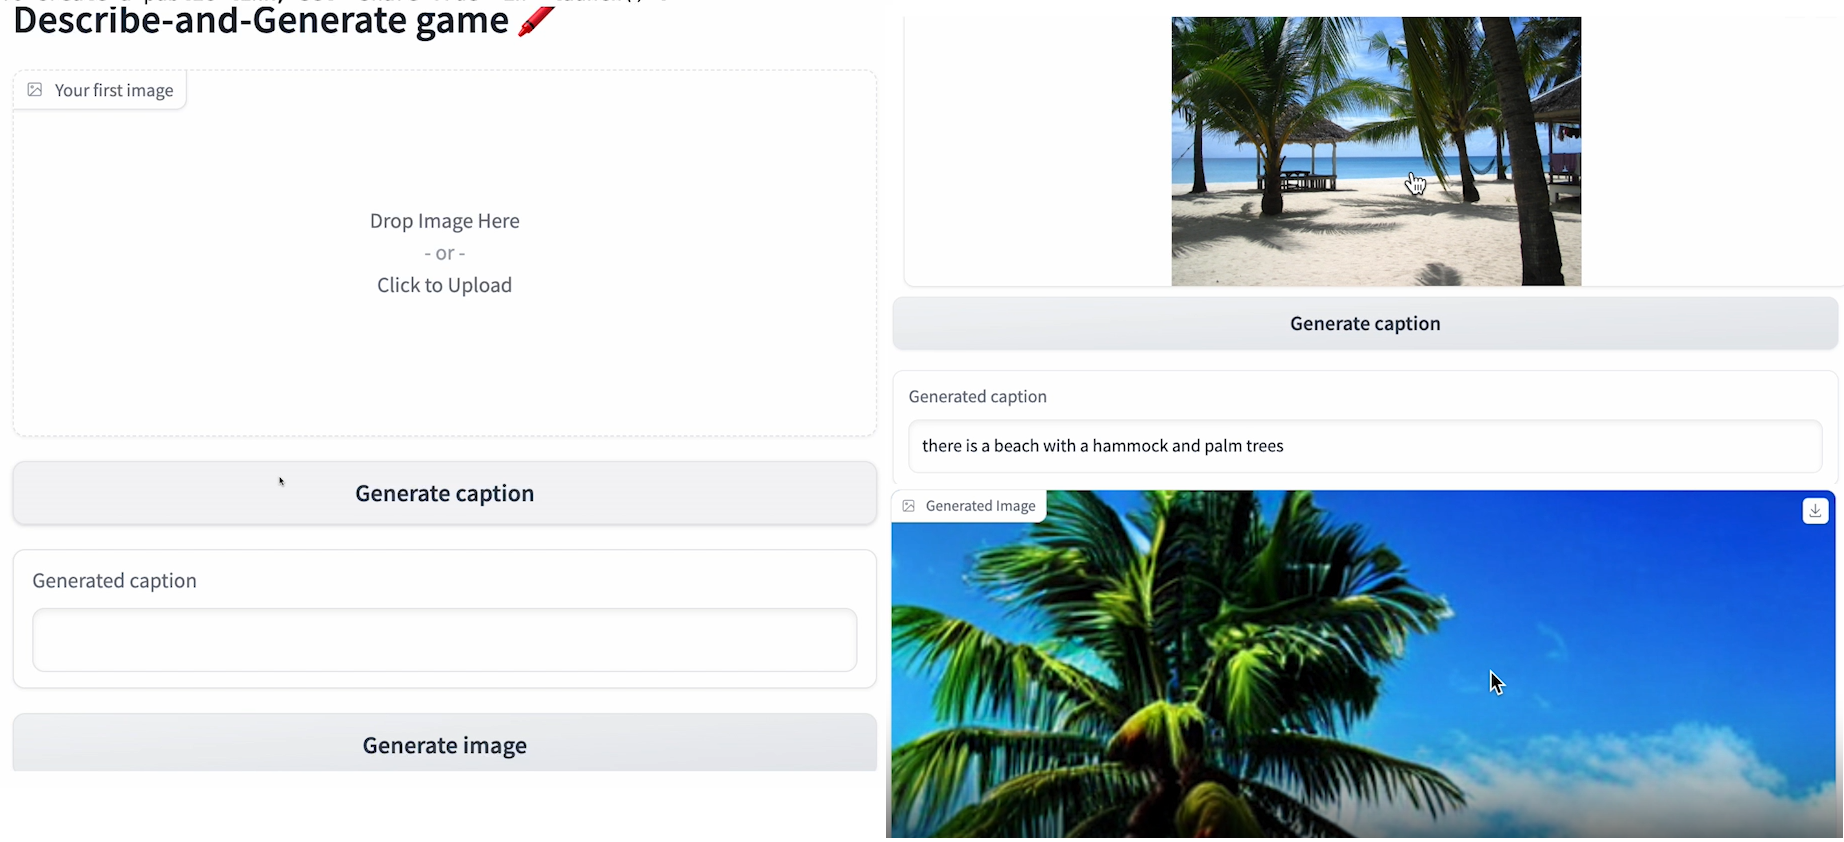

So here we'll upload an image, generate its caption, and from that caption, when I click generate image, it will then generate a new image from that caption. So see, we can do a telephone game where we upload an image, it will caption that image, we'll use that caption to then generate a new image. And you could then feed this image back into this and do a cool loops. So I would encourage you to try to do that.

### Doing it all at once! 

So take the generated image that you got and feed it back into the first image. Generate a new caption and keep doing that a few times and see if you'll get something different or if it always stays on theme. And that's cool, but maybe we want something more streamlined. So in a way, this is really nice because you can generate the caption, check how it looks, and then click Generate Image. But on another way, you have kind of two buttons. Some people might think that's confusing or too much for UI. So it's really up to you.

In [ ]:
def caption_and_generate(image):
    caption = captioner(image)
    image = generate(caption)
    return [caption, image]

with gr.Blocks() as demo:
    gr.Markdown("# Describe-and-Generate game 🖍️")
    image_upload = gr.Image(label="Your first image",type="pil")
    btn_all = gr.Button("Caption and generate")
    caption = gr.Textbox(label="Generated caption")
    image_output = gr.Image(label="Generated Image")

    btn_all.click(fn=caption_and_generate, inputs=[image_upload], outputs=[caption, image_output])

gr.close_all()
demo.launch(share=True, server_port=int(os.environ['PORT3']))

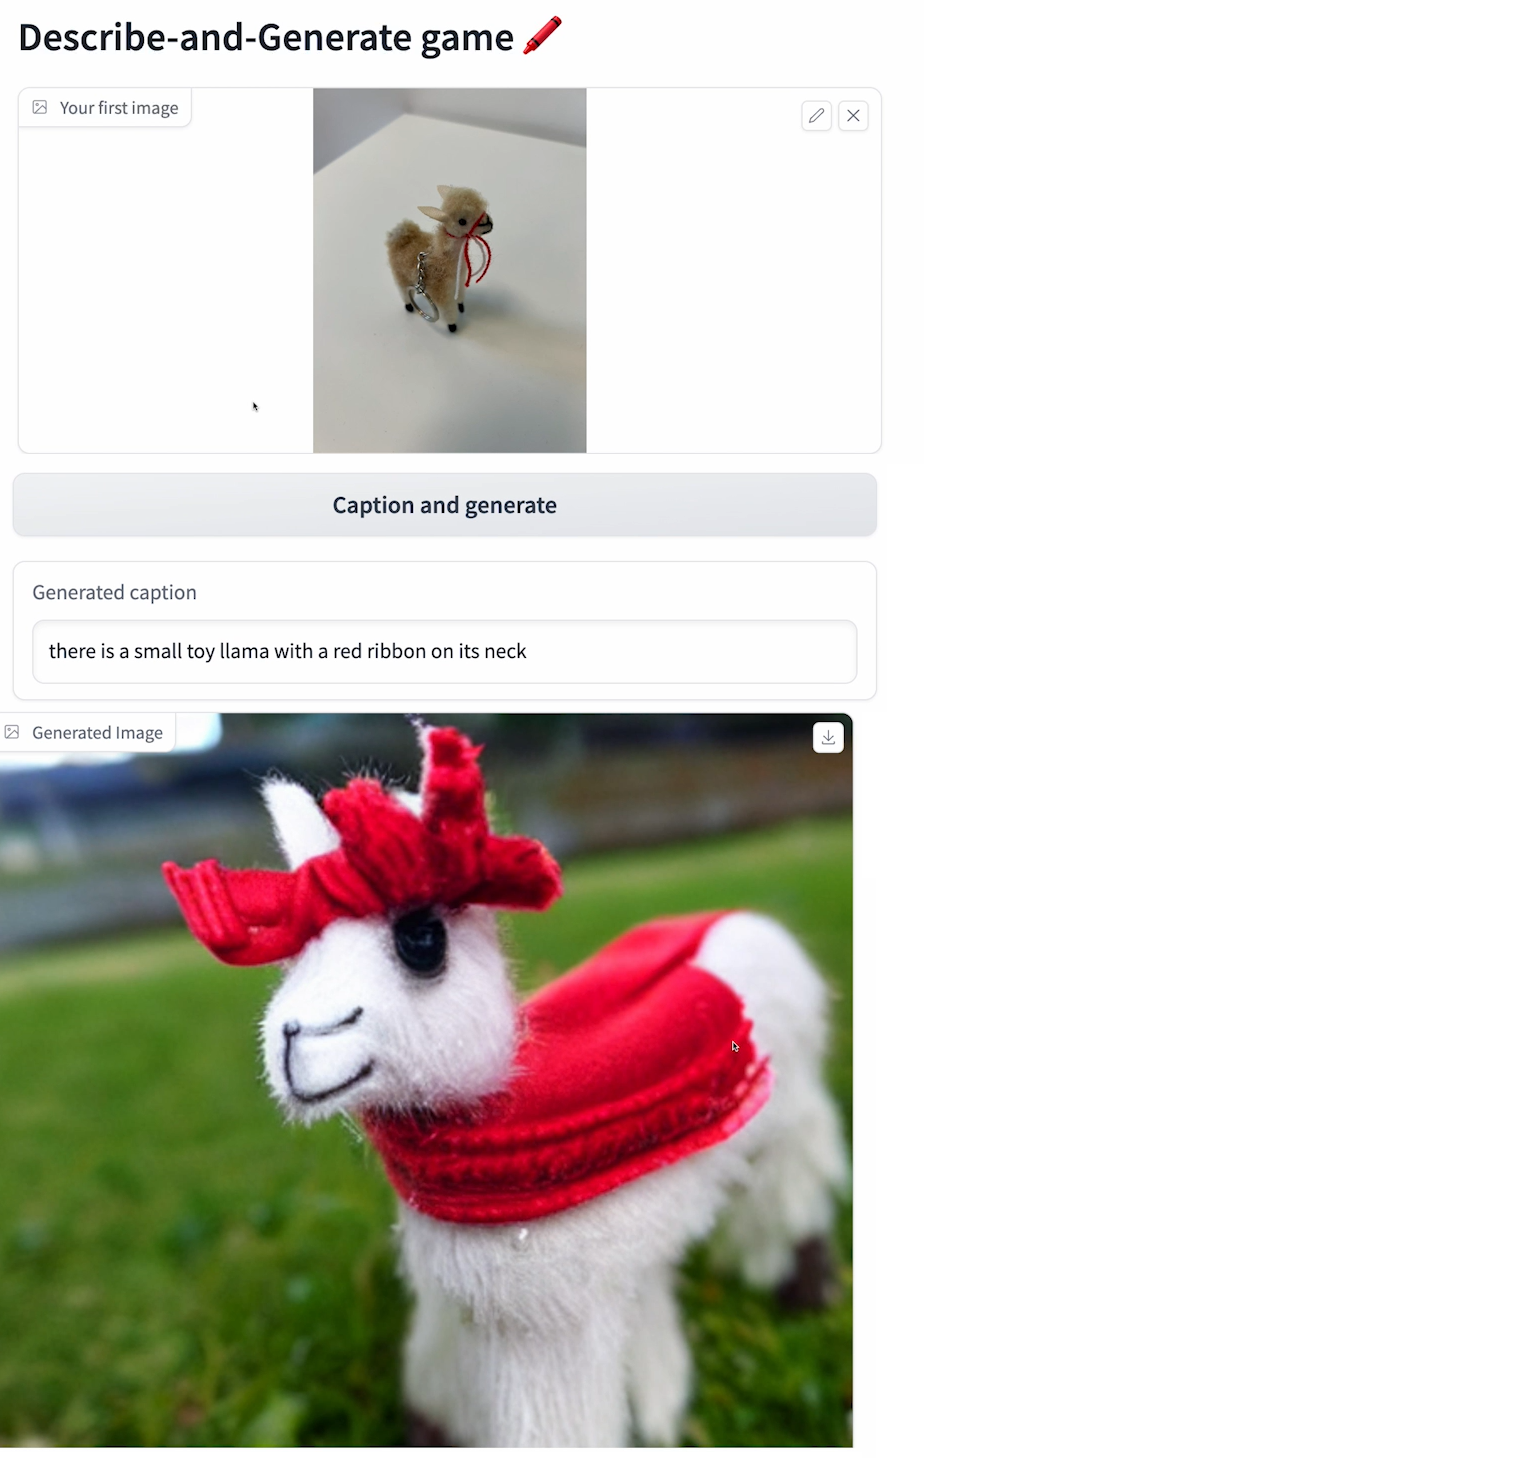

But I want to show you what a streamlined version would look like, where you would have a single function that is called. Caption and Generate that essentially calls the captioner and the generation. And then we do our game in a more streamlined way where you simply upload an image, press the Caption and Generate button and then get the caption and the generated image all at once. So let's see how that would look like.

So let me upload this image of this Llama keychain that I have here in the office. And let's see what it will caption and generate all at once. Okay, so there is a small toy llama with a red ribbon on its neck. Sounds good. Yeah, so it generated this cute little Llama with this kind of ribbon under its neck and yeah. So I encourage you to maybe take a picture of something in your surroundings or just take a picture that is in your computer of something cute and see how the captioning model and the downstream image is generated.

But essentially what I wanted to show you is the difference between a streamlined model that will do the two tasks at once and a bit more complex model with like two buttons where you can generate it in two steps. But congratulations, you've built your first game using Gradio and you combined what you learned from text to image to image to text in one very simple streamlined application. In our next lesson, you'll build a chatbot app powered by a state-of-the-art large language model.

In [ ]:
gr.close_all()